In [2]:
import deeptime
from deeptime.decomposition import TICA
import matplotlib
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import mdtraj as md
import numpy as np
import pyemma

### Extract features from the F-helix 

Full trajectories for the system can be generated using the starting files provided in the Supporting Information and following the methods described in the manuscript. From the set of starting trajectories, we extract the features relevant for our analysis from trajectories of just the protein F-helix. Please refer to the `extract_F_helix.ipynb` notebook for the relevant code to extract the F-helix from the full protein trajectories.

We provide the featurized trajectory in the file `combined_traj_TICA.npy` to allow users to run the analysis without the original trajectory files. 

In [3]:
# # Load in trajectories (may need to request more memory to fully load)
# traj_path='/dfs9/dmobley-lab/osatom/msm_project/trajectories/'

# traj_4w52 = md.load([traj_path + f'4w52_4w52/{x}/F-helix-centered.xtc' for x in range(6)], top=traj_path + '4w52_4w52/0/F-helix-centered.pdb')
# traj_4w57 = md.load([traj_path + f'4w57_4w57/{x}/F-helix-centered.xtc' for x in range(6)], top=traj_path + '4w57_4w57/0/F-helix-centered.pdb')
# traj_4w59 = md.load([traj_path + f'4w59_4w59/{x}/F-helix-centered.xtc' for x in range(6)], top=traj_path + '4w59_4w59/0/F-helix-centered.pdb')
# traj = md.join([traj_4w52, traj_4w57, traj_4w59])

# helix_top = traj_path + '4w59_4w59/0/F-helix-centered.pdb'

In [4]:
# CaCb_feat = pyemma.coordinates.featurizer(helix_top)
# ##Add Ca - Ca distances (36)
# Ca_distance_pairs = CaCb_feat.pairs(CaCb_feat.select_Ca())
# CaCb_feat.add_distances(Ca_distance_pairs, periodic=False)

# ##Add Cb - Cb distances (15)
# indices = [a.index for a in CaCb_feat.topology.atoms if a.name == 'CB']
# Cb_distance_pairs = CaCb_feat.pairs(indices)
# CaCb_feat.add_distances(Cb_distance_pairs, periodic=False)

In [5]:
#output = CaCb_feat.transform(traj)

In [13]:
# # Initialize TICA
# CaCb_tica = TICA(lagtime=10, epsilon=1e-6,
#                 var_cutoff=0.95).fit(output)
# CaCb_tica_output = CaCb_tica.transform(output)

# Save TICA coordinates
#np.save('combined_traj_TICA.npy', CaCb_tica_output)

In [18]:
CaCb_tica_output = np.load('combined_traj_TICA.npy')

#### Convert protein crystal structures to TICA coordinates

Similarly, we show how we convert the F-helix coordinates of the various protein crystal structures into our TICA coordinates. Again, we provide the TICA coordinates of the crystal structures in saved files to allow users to run the analysis without the original files. 

In [14]:
def TICA_convert(traj, feat):
    data = pyemma.coordinates.load(traj, features=feat)
    return CaCb_tica.transform(data)

In [15]:
# xtal_path = traj_path + 'crystal_structures/'

# closed_xtal = TICA_convert(xtal_path + '4w52_F_helix.xtc', CaCb_feat)
# int_xtal = TICA_convert(xtal_path + '4w57_F_helix.xtc', CaCb_feat)
# open_xtal = TICA_convert(xtal_path + '4w59_F_helix.xtc', CaCb_feat)

# np.save('4w52_helix_TICA.npy', closed_xtal)
# np.save('4w57_helix_TICA.npy', int_xtal)
# np.save('4w59_helix_TICA.npy', open_xtal)

In [19]:
closed_xtal = np.load('4w52_helix_TICA.npy')
int_xtal = np.load('4w57_helix_TICA.npy')
open_xtal = np.load('4w59_helix_TICA.npy')

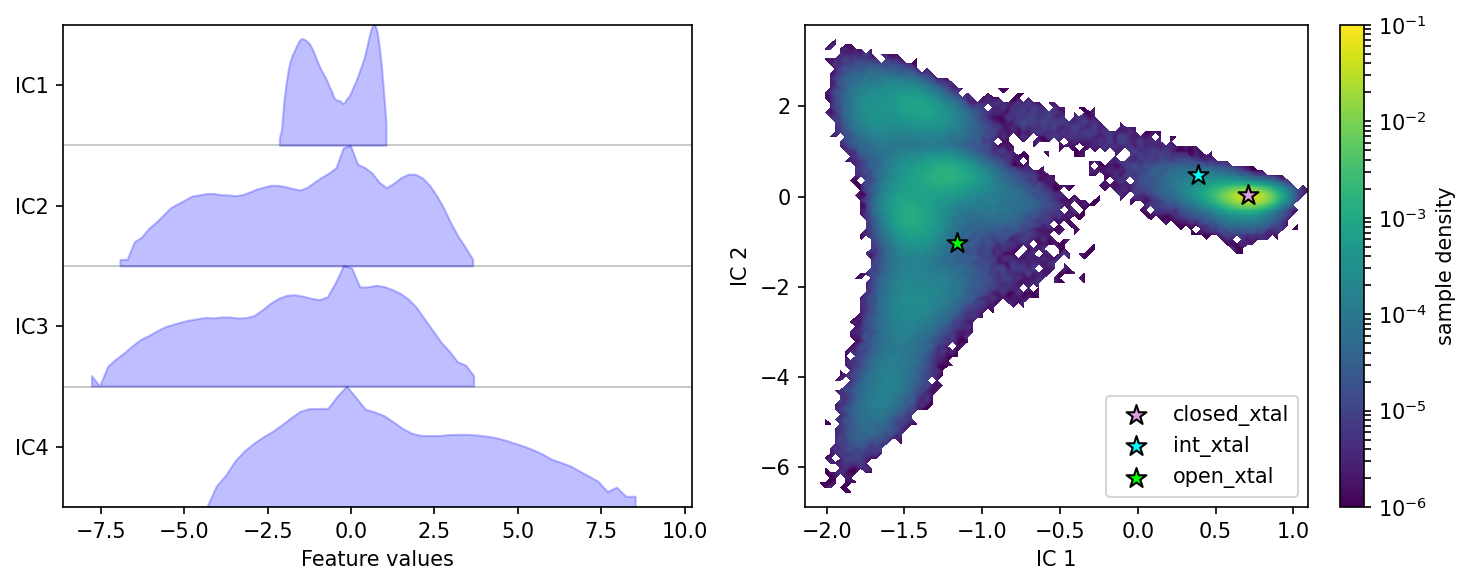

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), dpi=150)
pyemma.plots.plot_feature_histograms(CaCb_tica_output[:, :4], ax=axes[0],
    feature_labels=["IC{}".format(i+1) for i in range(4)], ylog=True)
pyemma.plots.plot_density(*CaCb_tica_output[:, :2].T, ax=axes[1], logscale=True)

axes[1].scatter(closed_xtal[:,0][::-1], closed_xtal[:,1][::-1], s=100, color='plum', marker='*', label='closed_xtal', edgecolor='black')
axes[1].scatter(int_xtal[:,0][::-1], int_xtal[:,1][::-1], s=100, color='cyan', marker='*', label='int_xtal', edgecolor='black')
axes[1].scatter(open_xtal[:,0][::-1], open_xtal[:,1][::-1], s=100, color='lime', marker='*', label='open_xtal', edgecolor='black')
axes[1].legend(loc='lower right')

axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()

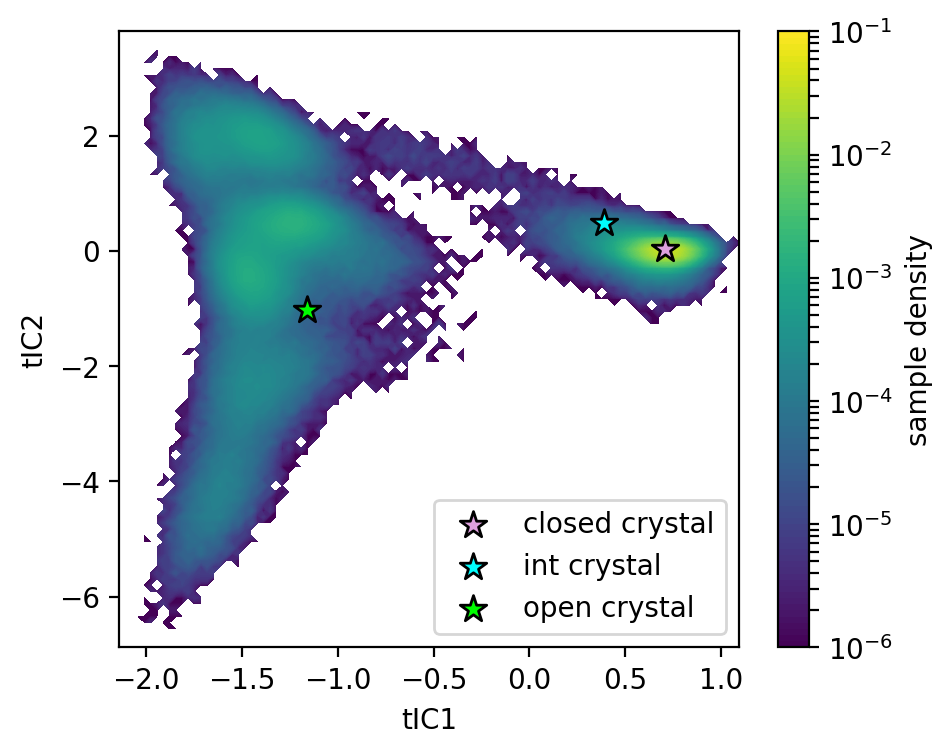

In [21]:
fig, axs = plt.subplots(figsize=(5,4), dpi=200)
pyemma.plots.plot_density(*CaCb_tica_output[:, :2].T, ax=axs, logscale=True)

axs.scatter(closed_xtal[:,0][::-1], closed_xtal[:,1][::-1], s=100, color='plum', marker='*', label='closed crystal', edgecolor='black')
axs.scatter(int_xtal[:,0][::-1], int_xtal[:,1][::-1], s=100, color='cyan', marker='*', label='int crystal', edgecolor='black')
axs.scatter(open_xtal[:,0][::-1], open_xtal[:,1][::-1], s=100, color='lime', marker='*', label='open crystal', edgecolor='black')
axs.legend(loc='lower right')

axs.set_xlabel('tIC1')
axs.set_ylabel('tIC2')
#fig.savefig('figures/tica_surface.png')
plt.show()

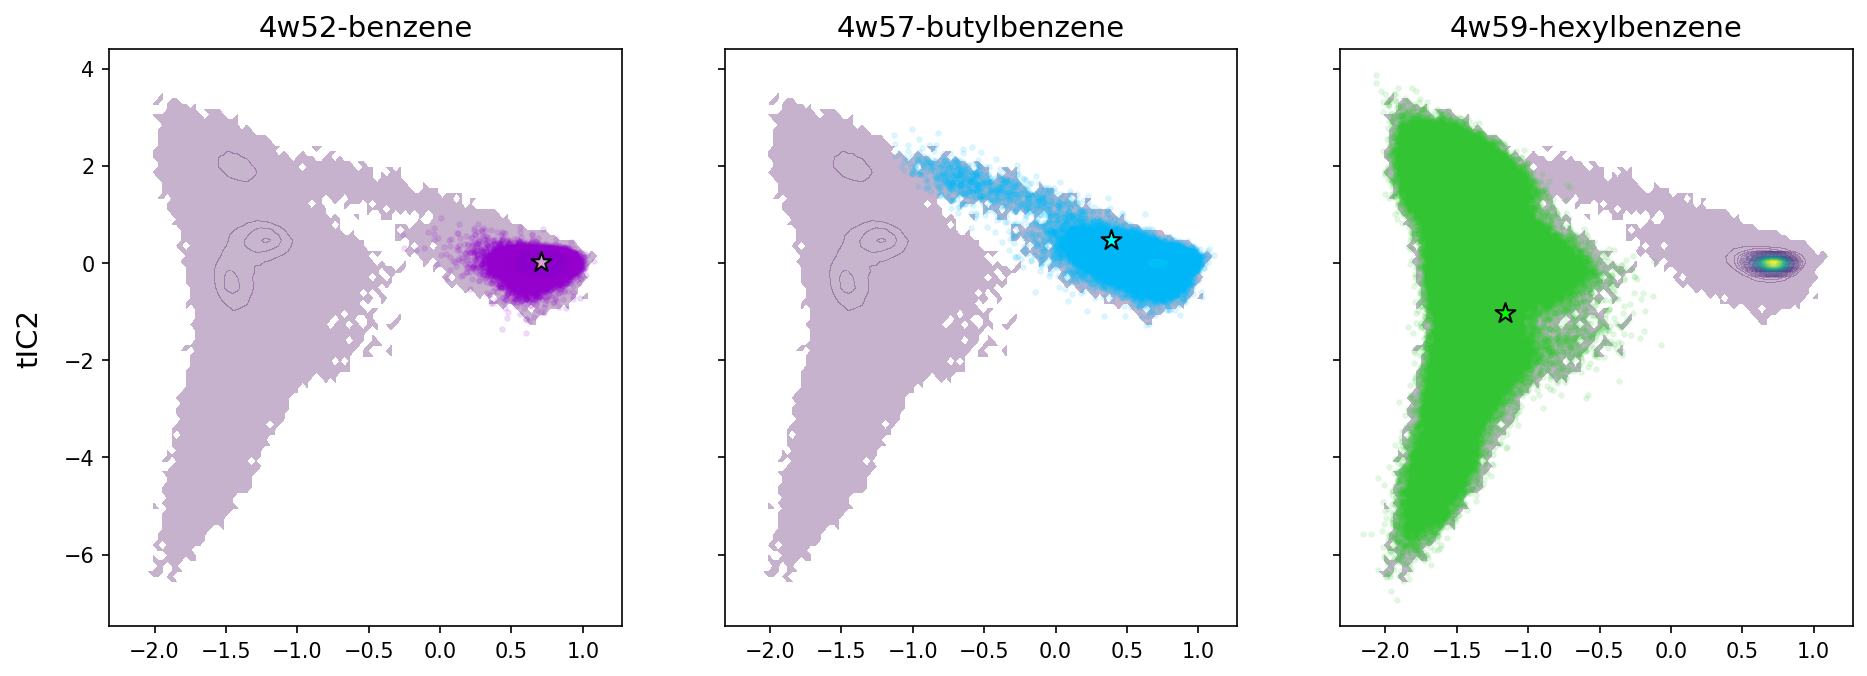

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(15,5), dpi=150, sharex=True, sharey=True)
pyemma.plots.plot_density(CaCb_tica_output[:,0], CaCb_tica_output[:,1], ax=axs[0], cbar=False, alpha=0.3)
axs[0].scatter(CaCb_tica_output[:50001*6,0], CaCb_tica_output[:50001*6,1], s=5, c='darkviolet', alpha=0.1)
axs[0].scatter(closed_xtal[:,0][::-1], closed_xtal[:,1][::-1], s=100, color='plum', marker='*', label='closed crystal', edgecolor='black')
axs[0].set_ylabel('tIC2', fontsize=14, labelpad=10)
axs[0].set_title('4w52-benzene', fontsize=14)

pyemma.plots.plot_density(CaCb_tica_output[:,0], CaCb_tica_output[:,1], ax=axs[1], cbar=False, alpha=0.3)
axs[1].scatter(CaCb_tica_output[50001*6:50001*12,0], CaCb_tica_output[50001*6:50001*12,1], s=5, c='deepskyblue', alpha=0.1)
axs[1].scatter(int_xtal[:,0][::-1], int_xtal[:,1][::-1], s=100, color='cyan', marker='*', label='int crystal', edgecolor='black')
axs[1].set_title('4w57-butylbenzene', fontsize=14)

pyemma.plots.plot_density(CaCb_tica_output[:,0], CaCb_tica_output[:,1], ax=axs[2], cbar=False, alpha=0.3)
axs[2].scatter(CaCb_tica_output[50001*12:,0], CaCb_tica_output[50001*12:,1], s=5, c='limegreen', alpha=0.1)
axs[2].scatter(open_xtal[:,0][::-1], open_xtal[:,1][::-1], s=100, color='lime', marker='*', label='open crystal', edgecolor='black')
axs[2].set_title('4w59-hexylbenzene', fontsize=14)

#fig.savefig('figures/concat_frames.png')

plt.show()

In [25]:
# # Calculate RMSD to each crystal structure
# xtal_path = traj_path + 'crystal_structures/'
# closed_pdb = md.load(xtal_path + '4w52_F_helix.pdb')
# int_pdb = md.load(xtal_path + '4w57_F_helix.pdb')
# open_pdb = md.load(xtal_path + '4w59_F_helix.pdb')
# xtal_structures = [closed_pdb, int_pdb, open_pdb]
# rmsds = [md.rmsd(traj, xtal, 0)*10 for xtal in xtal_structures]
# np.save('xtal_RMSDs.npy', rmsds)

In [31]:
rmsds = np.load('xtal_RMSDs.npy')

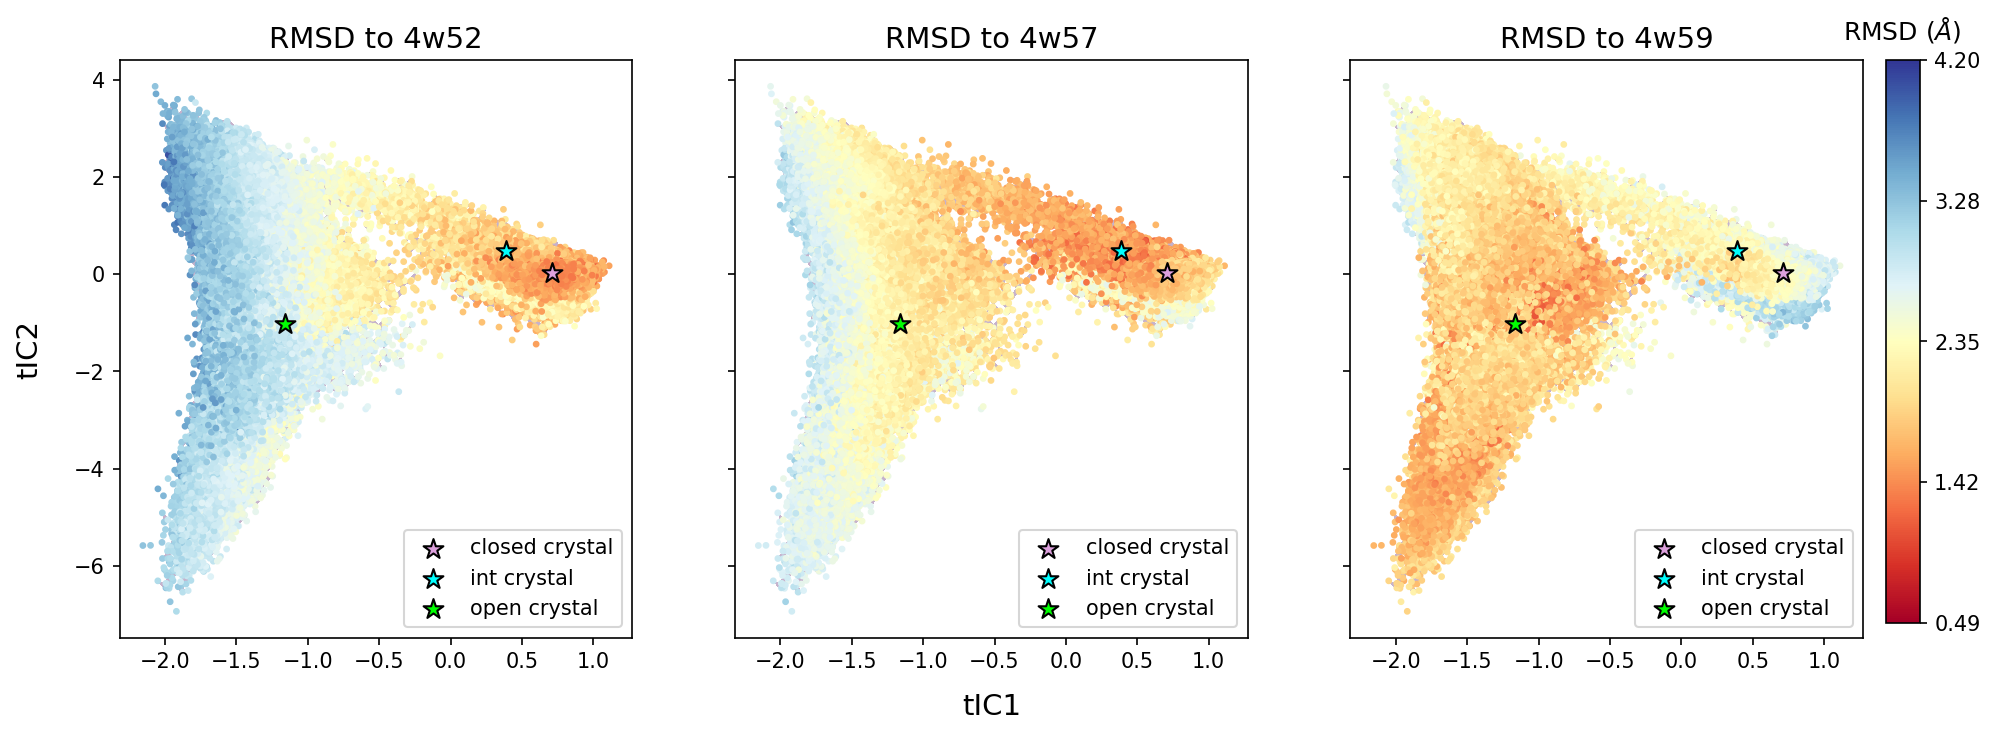

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(15,5), dpi=150, sharey=True)
total_min = np.min(np.min(rmsds, axis=0))
total_max = np.max(np.max(rmsds, axis=0))

title = ['4w52', '4w57', '4w59']

for i, ax in enumerate(axs.flatten()):
    pyemma.plots.plot_density(CaCb_tica_output[:,0], CaCb_tica_output[:,1], ax=ax, cbar=False, alpha=0.3)
    sc = ax.scatter(CaCb_tica_output[:,0], CaCb_tica_output[:,1], s=5, c=rmsds[i], vmin=total_min, vmax=total_max, cmap='RdYlBu')
    ax.scatter(closed_xtal[:,0][::-1], closed_xtal[:,1][::-1], s=100, color='plum', marker='*', label='closed crystal', edgecolor='black')
    ax.scatter(int_xtal[:,0][::-1], int_xtal[:,1][::-1], s=100, color='cyan', marker='*', label='int crystal', edgecolor='black')
    ax.scatter(open_xtal[:,0][::-1], open_xtal[:,1][::-1], s=100, color='lime', marker='*', label='open crystal', edgecolor='black')
    ax.set_title(f"RMSD to {title[i]}", fontsize=14)
    ax.legend(loc='lower right')

axs[0].set_ylabel('tIC2', fontsize=14, labelpad=15)
axs[1].set_xlabel('tIC1', fontsize=14, labelpad=10)

n_ticks = 5
cbar_ax = fig.add_axes([0.91, 0.13, 0.015, 0.75])
cbar_ax.set_title("RMSD ($\AA$)", pad=10)

cbar = plt.colorbar(sc, cax=cbar_ax)
cbar.set_ticks(np.linspace(total_min, total_max, n_ticks))
cbar.set_ticklabels([f"{x:.2f}" for x in np.linspace(total_min, total_max, n_ticks)])

#fig.savefig('figures/rmsd_xtal.png')

#fig.tight_layout()